# Deep Learning with Lasagne: The Force Awakens 
![alt text](../images/boardgame.jpg)

![alt text](../images/deeplearning.jpg "dl")

#  Let's classify the type of ship that appears in the image!

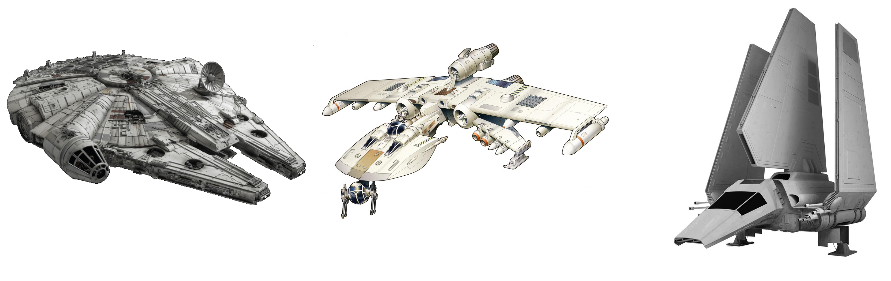

In [10]:
from IPython.display import Image
Image(filename='../images/ships.png') 

## How does our input data looks like?
![alt text](../images/dataset.png)

## Loading our images to a Pandas Dataframe

In [1]:
import os
import pandas as pd
import cv2

In [2]:
def images_to_file(path_to_photos):
    """
    Load images from folder and create a csv file with 
    X = pixel array and y = type of ship
    """
    ids = [os.path.splitext(image_id)[0] for image_id in os.listdir(path_to_photos)]
    df_out = pd.DataFrame(columns=['Image', 'Model', 'Model_enc'], index=ids)
    for image_file in os.listdir(path_to_photos):
            image = cv2.imread(os.path.join(path_to_photos, image_file), 0)
            df_out['Image'][os.path.splitext(image_file)[0]] = ' '.join(map(str, image.flatten()))
            df_out['Model'][os.path.splitext(image_file)[0]] = image_file.split('_')[0]
       
    catenc = pd.factorize(df_out['Model'])
    df_out['Model_enc'] = catenc[0]
    print(catenc)
    df_out.to_csv('../star_wars_data.csv')
    
    return df_out

In [11]:
images_to_file("../data/all/")

(array([0, 1, 1, ..., 0, 0, 1]), Index(['falcon', 'lambda', 'kwing'], dtype='object'))


,Image,Model,Model_enc
falcon_165,135 94 30 14 3 7 2 7 5 7 6 4 6 5 20 58 58 20 2...,falcon,0
lambda_000163,123 127 123 117 119 123 128 134 136 131 125 12...,lambda,1
lambda_000164,119 117 117 120 125 129 130 130 129 132 135 13...,lambda,1
lambda_052,107 108 107 105 104 103 102 100 140 158 157 15...,lambda,1
kwing_00098,0 13 43 83 104 111 124 132 138 138 130 113 101...,kwing,2
kwing_000224,7 23 29 9 8 12 16 20 8 29 40 24 30 38 41 43 41...,kwing,2
kwing_000121,27 18 16 17 8 0 1 7 21 23 21 7 2 2 33 68 53 53...,kwing,2
lambda_092,170 174 176 176 178 182 183 181 181 180 177 17...,lambda,1
falcon__154,19 21 24 25 28 31 32 32 29 44 37 20 21 50 72 8...,falcon,0
lambda_0108,126 129 130 127 126 127 129 130 129 130 130 12...,lambda,1


### How does the file we generate look like?

In [ ]:
!head ../star_wars_data.csv

### Now to format the input data for our network ...

In [3]:
import numpy as np
from sklearn.utils import shuffle

In [4]:
def load(images_dir="../data/all/", star_wars_fn='../star_wars_data.csv'):
    """
    Load images and target class for Falcon,
    Lambda and K-wing ships.
    """
    
    if os.path.exists(star_wars_fn):
        df = pd.read_csv(star_wars_fn)
    else:
        df = images_to_file(images_dir)
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    X = np.vstack(df['Image'].values) / 255.
    X = X.astype(np.float32)

    y = df['Model_enc'].values
    X, y = shuffle(X, y, random_state=42)
    y = y.astype(np.int32)
    
    return X, y

### What do we need to build our net ?

In [5]:
import warnings; warnings.simplefilter('ignore')
import theano
import lasagne
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from lasagne.layers import InputLayer, Conv2DLayer, DropoutLayer,\
                           MaxPool2DLayer, DenseLayer
from lasagne.objectives import categorical_crossentropy
from nolearn.lasagne import BatchIterator

Using gpu device 0: GeForce GTX 860M (CNMeM is disabled, CuDNN not available)


### How can we define the architecture of our network?

In [6]:
layers_1 = [
    # layer dealing with the input data
    (InputLayer, {'shape': (None, 1, 128, 128)}),
    
    # first stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 8, 'filter_size': 3,
     'W': lasagne.init.GlorotUniform()}),
    (MaxPool2DLayer, {'pool_size': 2}),

    # second stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 8, 'filter_size': 3,
     'W': lasagne.init.GlorotUniform()}),
    (MaxPool2DLayer, {'pool_size': 2}),
    
    # third stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 8, 'filter_size': 3,
     'W': lasagne.init.GlorotUniform()}),
    (MaxPool2DLayer, {'pool_size': 2}),
    
    # fourth stage of our convolutional layers
    (Conv2DLayer, {'num_filters': 16, 'filter_size': 3,
     'W': lasagne.init.GlorotUniform()}),
    (MaxPool2DLayer, {'pool_size': 2}),
    
    # two dense layers with dropout
    (DenseLayer, {'num_units': 64}),
    (DropoutLayer, {}),
    (DenseLayer, {'num_units': 64}),
    
    # the output layer
    (DenseLayer, {'num_units': 3, 
     'nonlinearity': lasagne.nonlinearities.softmax}),
]

In [8]:
def create_net(max_epochs=100):
    return NeuralNet(
        layers=layers_1,
        update=nesterov_momentum,
        update_learning_rate=theano.shared(np.float32(0.01)),
        #update_momentum=theano.shared(np.float32(0.9)),
        regression=False,
        #objective_loss_function=categorical_crossentropy,
        #batch_iterator_train=RotationBatchIterator(batch_size=512),
        #on_epoch_finished=[
        #    AdjustVariable('update_learning_rate', start=0.01, stop=0.001),
        #    AdjustVariable('update_momentum', start=0.9, stop=0.9999)
        #],
        max_epochs=max_epochs,
        verbose=1)

### Some Hyperparameter Tuning

Some things that you want to tune:
 - Net structure
 - learning rate
 - W initialization
 - Regularization
 

![alt text](../images/split.png "http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full")
Image from [Deep learning for computational biology](http://onlinelibrary.wiley.com/doi/10.15252/msb.20156651/full)

[Practical Recommendations for Gradient-Based Training of Deep Architectures - Yoshua Bengio](https://arxiv.org/pdf/1206.5533v2.pdf)

In [31]:
from sklearn.cross_validation import train_test_split
x, y = load("../data/all")
x = x.reshape(-1, 1, 128, 128)
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)
print(X_train.shape)

(3089, 1, 128, 128)


In [32]:
net = create_net(20)
net.fit(X_train, y_train)

# Neural Network with 43699 learnable parameters

## Layer information

  #  name        size
---  ----------  ---------
  0  input0      1x128x128
  1  conv2d1     8x126x126
  2  maxpool2d2  8x63x63
  3  conv2d3     8x61x61
  4  maxpool2d4  8x30x30
  5  conv2d5     8x28x28
  6  maxpool2d6  8x14x14
  7  conv2d7     16x12x12
  8  maxpool2d8  16x6x6
  9  dense9      64
 10  dropout10   64
 11  dense11     64
 12  dense12     3

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -----
      1     1.10023     1.09514    1.00465      0.38772  2.95s
      2     1.09227     1.08912    1.00290      0.38449  2.98s
      3     1.08450     1.07832    1.00572      0.40065  2.92s
      4     1.06957     1.04892    1.01968      0.45396  2.91s
      5     1.03281     0.97187    1.06271      0.56220  2.91s
      6     0.92713     0.81934    1.13156      0.66721  2.90s
      7     0.81099     0.67508    1.20132      0.70921  2.90s
     

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f28c2a92c88>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f28c2a92c50>,
     check_input=True, custom_scores=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 1, 128, 128)}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'num_filters': 8, 'filter_size': 3, 'W': <lasagne.init.GlorotUniform object at 0x7f28c1679630>}), (<class 'lasagne.layers.pool.MaxPool2DLayer'>, {'pool_size': 2}), (<clas....layers.dense.DenseLayer'>, {'num_units': 3, 'nonlinearity': <function softmax at 0x7f28c2b78ae8>})],
     loss=None, max_epochs=20, more_params={},
     objective=<function objective at 0x7f28c1669d90>,
     objective_loss_function=<function categorical_crossentropy at 0x7f28c2adcb70>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog object at 0x7f2890e4cd68>],
     on_training_finished=[],
     on_tr

## How can we test our net?

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nolearn.lasagne import visualize

In [33]:
print(classification_report(y_test, net.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97       465
          1       0.98      0.96      0.97       452
          2       0.95      0.96      0.95       408

avg / total       0.97      0.97      0.97      1325



In [13]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Taking a look at our *learning rate*


<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

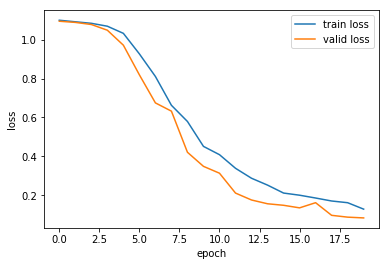

In [34]:
%matplotlib inline
visualize.plot_loss(net)

### How did our trained network do while classifying new ships?

In [15]:
def plot_matrix(clf, X_test, y_test):
    """
    Plot Confussion Matrix from a given classifier
    """
   
    plt.clf()
    
    cm = confusion_matrix(y_test, clf.predict(X_test))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
    cm_normalized[np.isnan(cm_normalized)] = 0.0
    print(cm_normalized)
    plt.tick_params(labelsize=20)

    ax = plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
    cb = plt.colorbar()
    cb.ax.tick_params(axis='both', labelsize=20)
    plt.ylabel("True label", fontsize=20)
    plt.xlabel("Predicted label", fontsize=20)
    plt.xticks(range(3),range(3))
    plt.yticks(range(3),range(3))



Normalized confusion matrix
[[ 0.96989247  0.02150538  0.00860215]
 [ 0.0199115   0.97566372  0.00442478]
 [ 0.03186275  0.0245098   0.94362745]]
[[451  10   4]
 [  9 441   2]
 [ 13  10 385]]


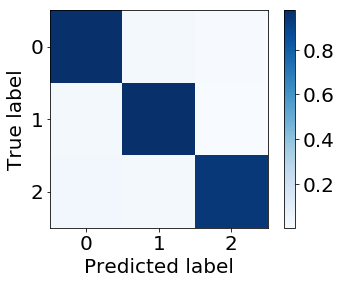

In [16]:
plot_matrix(net, X_test, y_test)
print(confusion_matrix(y_test, net.predict(X_test)))

### Do I have to train my network every time I want to use it ??
![alt text](../images/pickle.jpg)

In [17]:
import sys
import pickle
sys.setrecursionlimit(1000000)

In [18]:
with open('../data/ship_classifier.pickle', 'wb') as f:
        pickle.dump(net, f, -1)

In [19]:
net = None
with open('../data/ship_classifier.pickle', 'rb') as f:
       net = pickle.load(f)

In [20]:
from nolearn.lasagne import PrintLayerInfo
layer_info = PrintLayerInfo()

net.verbose = 1
net.initialize()
layer_info(net)

# Neural Network with 43699 learnable parameters

## Layer information

  #  name        size
---  ----------  ---------
  0  input0      1x128x128
  1  conv2d1     8x126x126
  2  maxpool2d2  8x63x63
  3  conv2d3     8x61x61
  4  maxpool2d4  8x30x30
  5  conv2d5     8x28x28
  6  maxpool2d6  8x14x14
  7  conv2d7     16x12x12
  8  maxpool2d8  16x6x6
  9  dense9      64
 10  dropout10   64
 11  dense11     64
 12  dense12     3



### What happens inside the network?

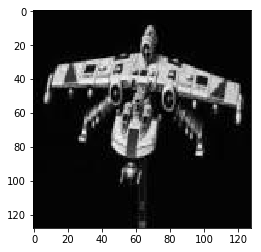

In [21]:
%matplotlib inline

my_image = cv2.imread("../data/kwing.jpg", 0)
plt.imshow(my_image, cmap='gray')
X = np.vstack(my_image) / 255.
plt.imshow(X, cmap='gray')
X = X.astype(np.float32)
X = X.reshape(-1, 1, 128, 128)

In [35]:
net.predict(X)

array([2])

### How sure is my network that I identify?

In [36]:
proba = net.predict_proba(X)
proba, proba.sum()

(array([[  1.72095397e-03,   1.17868758e-05,   9.98267293e-01]], dtype=float32),
 1.0)

In [37]:
proba[0, np.argmax(proba)]

0.99826729

#### What happens if we cover parts of our image? Which parts are important for classification?

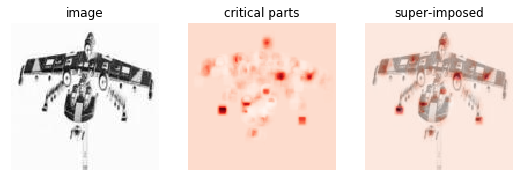

In [64]:
h = visualize.plot_occlusion(net, X, [2])

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

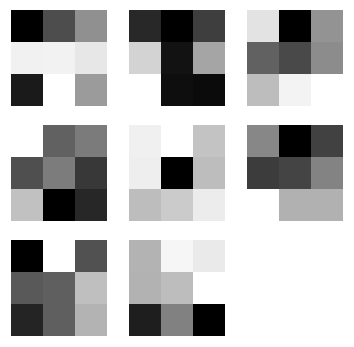

In [38]:
visualize.plot_conv_weights(net.layers_[1])

<module 'matplotlib.pyplot' from '/usr/lib/python3.6/site-packages/matplotlib/pyplot.py'>

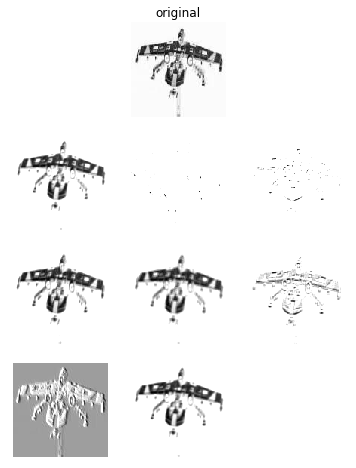

In [39]:
visualize.plot_conv_activity(net.layers_['conv2d1'], X)

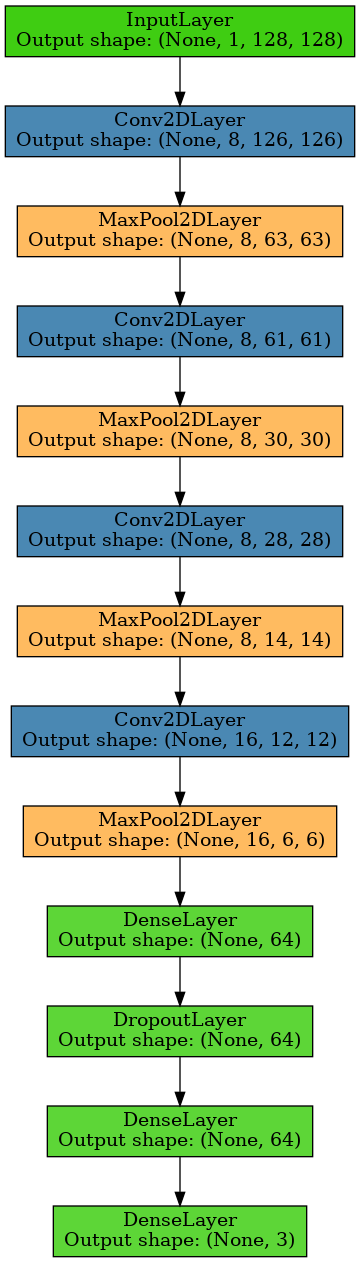

In [82]:
from nolearn.lasagne.visualize import draw_to_notebook

draw_to_notebook(net)

### Now let's use our network to classify from video !!

In [40]:
tipos_naves = {0: 'Falcon', 1: 'Lambda', 2: 'K-wing'}

def format_net(my_image):
        X = np.vstack(my_image) / 255.
        X = X.astype(np.float32)
        X = X.reshape(-1, 1, 128, 128)
        
        return X

### Showing the result frame by frame ..

In [41]:
import time
import cv2

def classifier_over_video(file_name=1):
    cap = cv2.VideoCapture(file_name)
    frames_count = cap.get(7)
    
    for frame_id in range(int(frames_count)):
        ret, frame = cap.read()
        frame_ = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame_ = cv2.equalizeHist(frame_)
        res = cv2.resize(frame_, (128, 128),
                         interpolation=cv2.INTER_CUBIC)
        X = format_net(res)
        
        pred = tipos_naves[net.predict(X)[0]]
        proba = net.predict_proba(X)
        proba = str(proba[0, np.argmax(proba)])
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame, pred, (10, 500),
                    font, 4, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.putText(frame, proba, (10, 800),
                    font, 4, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        
    cap.release()
    cv2.destroyAllWindows()

In [42]:
classifier_over_video("../data/videos_demo/tomados.mp4")

### I want to go deeper!
![alt text](../images/inception-meme.png)

- [Neural Networks and Deep Learning free online book](http://neuralnetworksanddeeplearning.com/index.html)
- [CS231n: Convolutional Neural Networks for Visual Recognition](http://cs231n.github.io/)
- [Unsupervised Feature Learning and Deep Learning.](http://deeplearning.stanford.edu/tutorial/)
- [Practical Recommendations for Gradient-Based Training of Deep Architectures - Yoshua Bengio](https://arxiv.org/pdf/1206.5533v2.pdf)
- [Efficient BackProp](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)
- Daniel Nouri. 2014. nolearn: scikit-learn compatible neural network library https://github.com/dnouri/nolearn
- LeCun, Y., Bengio, Y., & Hinton, G. (2015). Deep learning. Nature, 521(7553), 436–444. 
- Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Journal of Machine Learning Research, 15, 1929–1958.
- Bergstra, J., Bastien, F., Breuleux, O., Lamblin, P., Pascanu, R., Delalleau, O., Bengio, Y. (2011). Theano: Deep Learning on GPUs with Python. Journal of Machine Learning Research, 1, 1–48.
- Shwartz-Ziv, R., & Tishby, N. (2017). Opening the Black Box of Deep Neural Networks via Information. arXiv, 1–19. 
![alt text](../images/bye.jpg)

